The movies dataset ->https://www.kaggle.com/rounakbanik/the- movies-dataset

In [6]:
#from pathlib import Path

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import plotly

ModuleNotFoundError: No module named 'plotly'

In [2]:
#DATA_DIR = Path('../data')
#RAW_DIR = DATA_DIR / 'raw'
#PROCESSED_DIR = DATA_DIR / 'processed'

In [21]:
#raw_ratings_df = pd.read_csv(DATA_DIR / 'ratings_small.csv')
#raw_movies_df = pd.read_csv(DATA_DIR / 'movies_metadata.csv')
#display(raw_ratings_df.sample(5))
#raw_movies_df.sample(5)
raw_ratings_df = pd.read_csv('ratings_small.csv')
raw_movies_df = pd.read_csv('movies_metadata.csv')

/Users/salilmarathponmadom/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning:

Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.



## Column types

In [22]:
raw_ratings_df.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [23]:
raw_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100004 non-null  int64  
 1   movieId    100004 non-null  int64  
 2   rating     100004 non-null  float64
 3   timestamp  100004 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


- Timestamp is the time when the ... so we need to convert it to datetime

## Missing Values

In [24]:
raw_ratings_df.isna().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

## Distribution

### Ratings

In [25]:
raw_ratings_df.rating.describe()

count    100004.000000
mean          3.543608
std           1.058064
min           0.500000
25%           3.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

<AxesSubplot:xlabel='rating'>

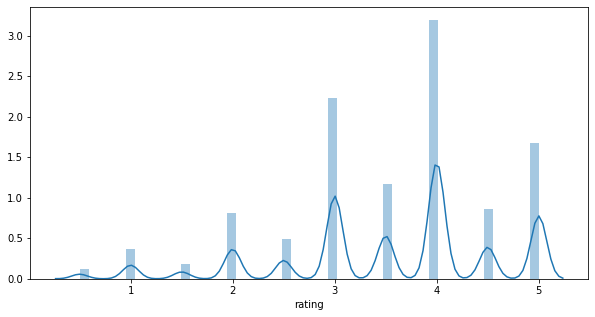

In [26]:
plt.figure(figsize=(10,5))
sns.distplot(raw_ratings_df.rating)

In [9]:
pip install plotly

     |████████████████████████████████| 13.2 MB 5.7 MB/s eta 0:00:01
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11430 sha256=9943321ec07a3b7602632ee802df826a5bb40faa96e26e1e170c9ddfb69c9457
  Stored in directory: /Users/salilmarathponmadom/Library/Caches/pip/wheels/c4/a7/48/0a434133f6d56e878ca511c0e6c38326907c0792f67b476e56
Successfully built retrying
Note: you may need to restart the kernel to use updated packages.


## Filtering the rating Greater than 4 from raw_Ratings




In [28]:
raw_ratings_df

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
...,...,...,...,...
99999,671,6268,2.5,1065579370
100000,671,6269,4.0,1065149201
100001,671,6365,4.0,1070940363
100002,671,6385,2.5,1070979663


In [30]:
ratings_df = raw_ratings_df.copy()
ratings_df

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
...,...,...,...,...
99999,671,6268,2.5,1065579370
100000,671,6269,4.0,1065149201
100001,671,6365,4.0,1070940363
100002,671,6385,2.5,1070979663


In [33]:
ratings = ratings_df.drop('timestamp',axis=1)
ratings 
# Now we have ratings data set with Only Userid , movie id and ratings 

,userId,movieId,rating
0,1,31,2.5
1,1,1029,3.0
2,1,1061,3.0
3,1,1129,2.0
4,1,1172,4.0
...,...,...,...
99999,671,6268,2.5
100000,671,6269,4.0
100001,671,6365,4.0
100002,671,6385,2.5


In [43]:
#Filter Out Ratings Greater than 4
#good_ratings = ratings['rating'] > 4
good_ratings = ratings[ratings.rating > 4.0 ]
good_ratings

,userId,movieId,rating
21,2,17,5.0
22,2,39,5.0
29,2,150,5.0
37,2,222,5.0
44,2,265,5.0
...,...,...,...
99981,671,4973,4.5
99982,671,4993,5.0
99989,671,5445,4.5
99994,671,5952,5.0


#### Earlier we had 100004 rows now with the ratings grater than 4 filtered to only 22818 rows values
#### Lets visulaize those values only

In [57]:
import plotly.express as px
#plt.figure(figsize=(200,200))
fig = px.histogram(good_ratings, x= good_ratings['rating'])
fig.show()

In [80]:
#Meta data
#raw_movies_df.head()
raw_movies_df.sample(10)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
28583,False,"{'id': 223926, 'name': 'Impy, the small dinosa...",0,"[{'id': 16, 'name': 'Animation'}, {'id': 12, '...",NaN,78124,tt1210117,de,Urmel voll in Fahrt,The German-language CG-animated fantasy Urmel ...,...,2008-05-01,0.0,84.0,"[{'iso_639_1': 'de', 'name': 'Deutsch'}]",Released,NaN,Impy's Wonderland,False,7.1,9.0
28635,False,NaN,0,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",NaN,317683,tt0060790,en,Password: Uccidete agente Gordon,A tough CIA agent is called in to put a stop t...,...,1966-03-29,0.0,95.0,[],Released,NaN,Password: Uccidete agente Gordon,False,0.0,0.0
26276,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 37, 'name...",NaN,42619,tt0065079,en,Tell Them Willie Boy Is Here,"Based on true events that happened in Banning,...",...,1969-10-31,0.0,98.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Tell Them Willie Boy Is Here,False,5.3,21.0
7131,False,NaN,14000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,22004,tt0105636,en,Trespass,"Two Arkansas firemen, Vince and Don, get hold ...",...,1992-12-25,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,They all came to the wrong place at the wrong ...,Trespass,False,6.2,46.0
31845,False,NaN,0,"[{'id': 53, 'name': 'Thriller'}, {'id': 878, '...",NaN,321662,tt3312936,en,LA Apocalypse,For 5 billion years the Earth's core has opera...,...,2014-06-20,0.0,80.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,LA Apocalypse,False,4.7,15.0
12537,False,NaN,8000000,"[{'id': 18, 'name': 'Drama'}, {'id': 27, 'name...",NaN,11152,tt0963794,en,The Ruins,A group of friends whose leisurely Mexican hol...,...,2008-04-02,0.0,91.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Terror has evolved.,The Ruins,False,5.6,270.0
6266,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",NaN,11145,tt0079100,en,The Electric Horseman,"Sonny Steele used to be a rodeo star, but his ...",...,1979-12-21,61801971.0,122.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,The Electric Horseman,False,5.4,35.0
38998,False,NaN,0,"[{'id': 37, 'name': 'Western'}]",NaN,3698,tt0068203,it,"Amico, stammi lontano almeno un palmo","When Ben Bellow is released from prison, Charl...",...,1972-02-04,0.0,98.0,"[{'iso_639_1': 'it', 'name': 'Italiano'}]",Released,NaN,"Amigo, Stay Away",False,9.0,2.0
14286,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,67062,tt0062352,pt,Terra em Transe,"Eldorado, a fictitious country in Latin Americ...",...,1967-05-08,0.0,110.0,"[{'iso_639_1': 'pt', 'name': 'Português'}]",Released,NaN,Entranced Earth,False,6.3,20.0
16443,False,NaN,42000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://www.iamrogue.com/thewarriorsway,46528,tt1032751,en,The Warrior's Way,An Asian assassin (Dong-gun Jang) is forced to...,...,2010-12-02,11087569.0,100.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Assassin. Hero. Legend.,The Warrior's Way,False,6.3,138.0


In [81]:
raw_movies_df.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [82]:
raw_movies_df.shape

(45466, 24)

In [83]:
#raw_movies_df.isna()
raw_movies_df.isna().sum()

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

### Conditional selection of coloums of our interest from the movies meta data

In [92]:
# Selecting only production companies
raw_movies_df.production_countries

0        [{'iso_3166_1': 'US', 'name': 'United States o...
1        [{'iso_3166_1': 'US', 'name': 'United States o...
2        [{'iso_3166_1': 'US', 'name': 'United States o...
3        [{'iso_3166_1': 'US', 'name': 'United States o...
4        [{'iso_3166_1': 'US', 'name': 'United States o...
                               ...                        
45461               [{'iso_3166_1': 'IR', 'name': 'Iran'}]
45462        [{'iso_3166_1': 'PH', 'name': 'Philippines'}]
45463    [{'iso_3166_1': 'US', 'name': 'United States o...
45464             [{'iso_3166_1': 'RU', 'name': 'Russia'}]
45465     [{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]
Name: production_countries, Length: 45466, dtype: object

In [94]:
meta_data = raw_movies_df.copy() #creating a copy of raw movies metadata
nona_meta_data = meta_data['production_countries'].dropna()

In [96]:
meta_data.shape

(45466, 24)

In [97]:
nona_meta_data.shape # 

(45463,)

In [98]:
nona_meta_data.sample(6) 

33971              [{'iso_3166_1': 'ES', 'name': 'Spain'}]
35105    [{'iso_3166_1': 'US', 'name': 'United States o...
33880                                                   []
45095             [{'iso_3166_1': 'RU', 'name': 'Russia'}]
17869    [{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...
14890                                                   []
Name: production_countries, dtype: object